<a href="https://colab.research.google.com/github/Logesh7-R/DATA_SCIENCE_AI_DEEP_LEARNING/blob/main/project_cirrohosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree

In [132]:
df = pd.read_csv("cirrhosis.csv")
df.sample(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
255,256,1701,C,D-penicillamine,11485,F,N,N,N,N,1.1,336.0,3.74,48.0,823.0,84.00,108.0,242.0,9.7,3.0
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
203,204,2090,D,Placebo,22857,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,281.0,10.2,3.0
127,128,1037,D,D-penicillamine,15322,F,N,Y,Y,N,16.2,NaN,2.89,42.0,1828.0,299.15,NaN,123.0,12.6,4.0
37,38,3244,D,Placebo,13378,F,N,Y,Y,N,3.3,383.0,3.53,102.0,1234.0,137.95,87.0,234.0,11.0,4.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [134]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [135]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [136]:
df.corr()

<ipython-input-136-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.032897,-0.128924,-0.098663,-0.352856,-0.012097,-0.034100,-0.076699,-0.191930,-0.033757
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,0.037136,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899


In [137]:
df.dropna(subset=['Stage'],inplace=True)

In [138]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             100
Age                0
Sex                0
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              0
Bilirubin          0
Cholesterol      128
Albumin            0
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    130
Platelets         11
Prothrombin        2
Stage              0
dtype: int64

In [139]:
df.columns.to_list()

['ID',
 'N_Days',
 'Status',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   N_Days         412 non-null    int64  
 2   Status         412 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            412 non-null    int64  
 5   Sex            412 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          412 non-null    object 
 10  Bilirubin      412 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        412 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      401 non-null    float64
 18  Prothrombi

In [141]:
df1 = df.fillna(df.mean())
df1.dropna(inplace=True)
df1.tail()

<ipython-input-141-3a5ac1f78fb1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df.fillna(df.mean())


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.0,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.0,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.0,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.0,88.0,335.0,10.5,2.0
311,312,788,C,Placebo,12109,F,N,N,Y,N,6.4,576.0,3.79,186.0,2115.0,136.0,149.0,200.0,10.8,2.0


In [142]:
df1.corr()


<ipython-input-142-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.392999,-0.080389,-0.085152,0.031800,-0.082337,-0.098515,-0.352856,-0.012097,-0.032874,-0.006561,-0.340261,-0.050346
N_Days,-0.392999,1.000000,-0.133682,-0.441793,-0.130596,0.435849,-0.364148,0.149269,-0.225492,-0.144523,0.189959,-0.168299,-0.371641
Age,-0.080389,-0.133682,1.000000,0.038601,-0.149287,-0.195264,0.061299,-0.047247,-0.149869,0.020896,-0.138780,0.196300,0.168182
Bilirubin,-0.085152,-0.441793,0.038601,1.000000,0.380560,-0.334638,0.456512,0.116984,0.441730,0.418504,-0.086360,0.361742,0.241367
Cholesterol,0.031800,-0.130596,-0.149287,0.380560,1.000000,-0.063955,0.123024,0.140112,0.337282,0.276828,0.178247,-0.029407,0.010395
Albumin,-0.082337,0.435849,-0.195264,-0.334638,-0.063955,1.000000,-0.264312,-0.101456,-0.220047,-0.094699,0.202209,-0.234013,-0.336970
Copper,-0.098515,-0.364148,0.061299,0.456512,0.123024,-0.264312,1.000000,0.187285,0.293547,0.272473,-0.063671,0.217877,0.268273
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.140112,-0.101456,0.187285,1.000000,0.112217,0.168702,0.142719,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.337282,-0.220047,0.293547,0.112217,1.000000,0.119463,-0.118885,0.112174,0.164945
Tryglicerides,-0.032874,-0.144523,0.020896,0.418504,0.276828,-0.094699,0.272473,0.168702,0.119463,1.000000,0.094657,0.019149,0.115358


In [143]:

encoder = LabelEncoder()
df1['Drug'] = encoder.fit_transform(df1['Drug'].values.reshape(-1, 1))
df1['Status'] = encoder.fit_transform(df1['Status'].values.reshape(-1, 1))
df1['Sex'] = encoder.fit_transform(df1['Sex'].values.reshape(-1, 1))
df1['Ascites'] = encoder.fit_transform(df1['Ascites'].values.reshape(-1, 1))
df1['Hepatomegaly'] = encoder.fit_transform(df1['Hepatomegaly'].values.reshape(-1, 1))
df1['Spiders'] = encoder.fit_transform(df1['Spiders'].values.reshape(-1, 1))
df1['Edema'] = encoder.fit_transform(df1['Edema'].values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

<Axes: >

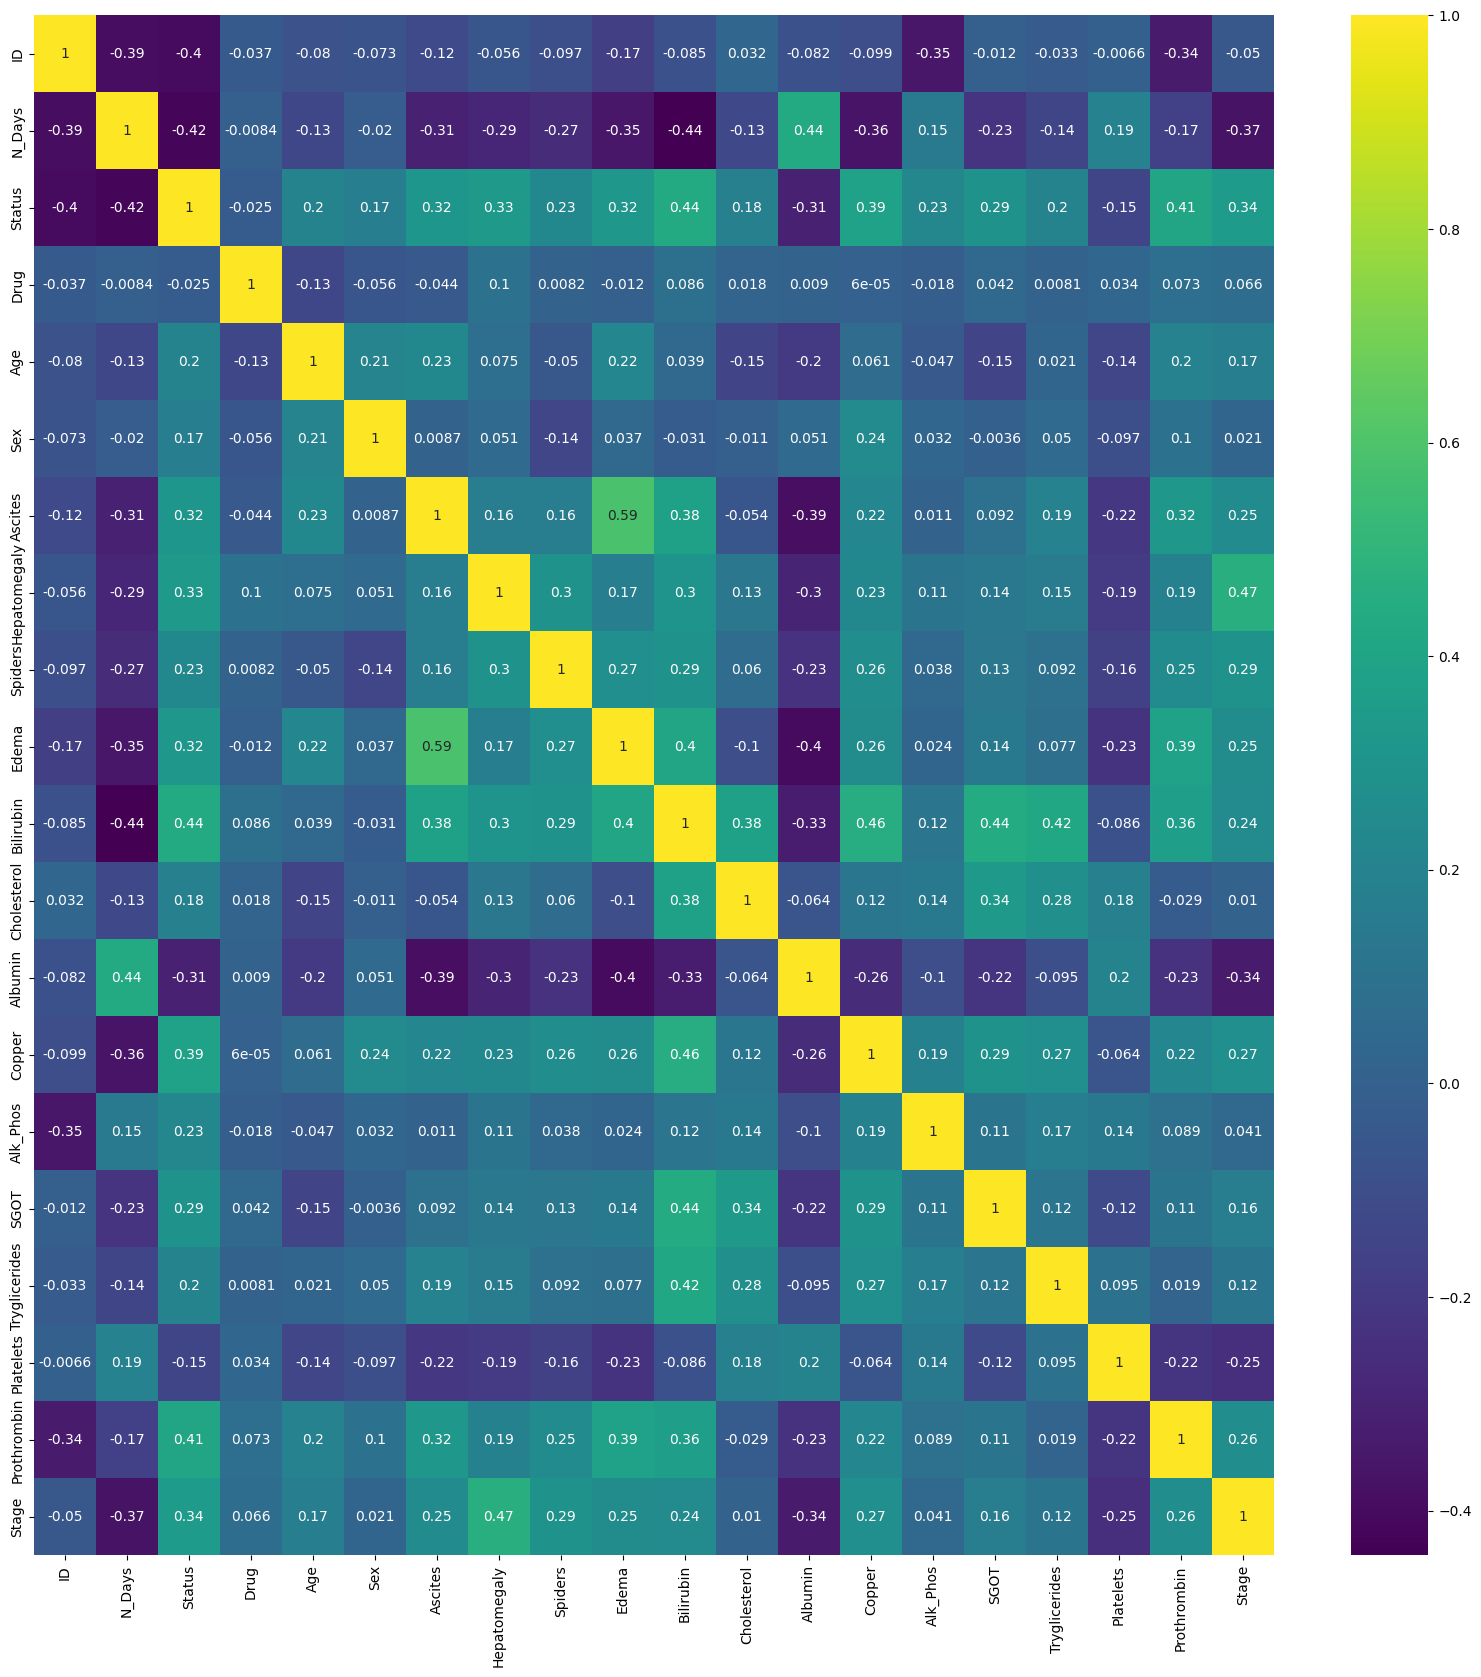

In [220]:
corr = df1.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='viridis')

In [224]:
x_all_name = df1.columns.to_list()
x_all_name
list= ['Hepatomegaly','Status','Spiders','Prothrombin','Edema','Ascites','Bilirubin','Copper','Age','SGOT','Tryglicerides','Drug']

(array([ 21.,   0.,   0.,  92.,   0.,   0., 155.,   0.,   0., 144.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

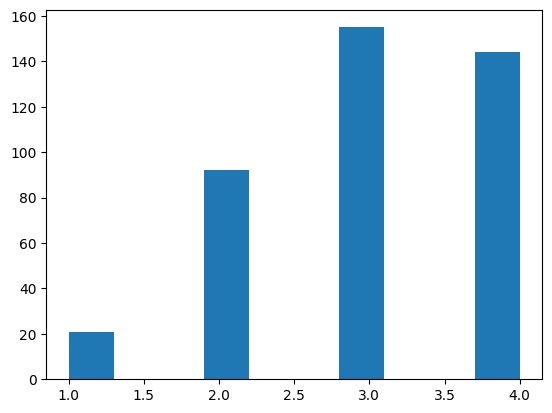

In [152]:
plt.hist(df['Stage'])


In [160]:
df1.describe()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,156.500000,2006.362179,0.862179,0.493590,18269.442308,0.115385,0.076923,0.512821,0.288462,0.221154,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.860285,10.725641,3.032051
std,90.210864,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.549014,4.530315,221.257085,0.419892,85.338190,2140.388824,56.699525,61.926753,94.994179,1.004323,0.877880
min,1.000000,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,0.000000,0.000000,15427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,156.500000,1839.500000,0.000000,0.000000,18187.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,256.102244,10.600000,3.000000
75%,234.250000,2697.250000,2.000000,1.000000,20715.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000
max,312.000000,4556.000000,2.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [163]:
df1.shape

(312, 20)

In [197]:
x_all_name = df1.columns.to_list()
x_all_name.remove('Stage')
y = df1['Stage']
x_all= df1[x_all_name]


In [225]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func = chi2, k=10 )
x = fs.fit_transform(x_all,y)
temp = fs.get_support(True)
list = []
for i in temp:
  list.append(x_all_name[i])
list'''
x=df1[list]
x

,Hepatomegaly,Status,Spiders,Prothrombin,Edema,Ascites,Bilirubin,Copper,Age,SGOT,Tryglicerides,Drug
0,1,2,1,12.2,2,1,14.5,156.0,21464,137.95,172.0,0
1,1,0,1,10.6,0,0,1.1,54.0,20617,113.52,88.0,0
2,0,2,0,12.0,1,0,1.4,210.0,25594,96.10,55.0,0
3,1,2,1,10.3,1,0,1.8,64.0,19994,60.63,92.0,0
4,1,1,1,10.9,0,0,3.4,143.0,13918,113.15,72.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
307,1,0,0,10.4,0,0,0.4,24.0,22347,91.00,113.0,0
308,0,0,0,10.8,0,0,0.4,41.0,21294,70.00,82.0,1
309,0,0,0,10.2,0,0,1.7,39.0,22767,171.00,100.0,0
310,0,0,0,10.5,0,0,2.0,69.0,13879,117.00,88.0,0


In [226]:
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size=0.15,random_state=56)

In [227]:
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_test = sc.transform(x_test)

In [228]:
lr = LogisticRegression()
lr.fit(x_tr,y_tr)
y_lr_pre = lr.predict(x_test)
y_lr_pre

array([4., 3., 4., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3., 3., 4., 1., 3.,
       3., 4., 4., 3., 4., 4., 3., 4., 3., 3., 4., 3., 4., 4., 3., 3., 3.,
       3., 4., 3., 3., 4., 3., 3., 3., 4., 4., 4., 3., 4.])

In [229]:
dt = DecisionTreeClassifier()
dt.fit(x_tr,y_tr)
y_dt_pre = dt.predict(x_test)
y_dt_pre

array([2., 2., 2., 1., 3., 3., 3., 3., 3., 3., 3., 4., 3., 2., 4., 4., 3.,
       4., 3., 3., 4., 4., 4., 3., 4., 3., 3., 3., 3., 2., 4., 4., 4., 3.,
       2., 3., 3., 3., 4., 1., 4., 4., 3., 3., 4., 2., 4.])

In [230]:
rf = RandomForestClassifier(n_estimators=45)
rf.fit(x_tr,y_tr)
y_rf_pre = dt.predict(x_test)
y_rf_pre

array([2., 2., 2., 1., 3., 3., 3., 3., 3., 3., 3., 4., 3., 2., 4., 4., 3.,
       4., 3., 3., 4., 4., 4., 3., 4., 3., 3., 3., 3., 2., 4., 4., 4., 3.,
       2., 3., 3., 3., 4., 1., 4., 4., 3., 3., 4., 2., 4.])

In [234]:
accuracy_lr=accuracy_score(y_lr_pre, y_test)*100
accuracy_dt=accuracy_score(y_dt_pre, y_test)*100
accuracy_rf=accuracy_score(y_rf_pre, y_test)*100
matrix_lr=confusion_matrix(y_test, y_lr_pre)
matrix_dt=confusion_matrix(y_test, y_dt_pre)
matrix_rf=confusion_matrix(y_test, y_rf_pre)

[Text(0.5720229289940828, 0.9666666666666667, 'Hepatomegaly <= -0.042\ngini = 0.683\nsamples = 265\nvalue = [15, 57, 105, 88]'),
 Text(0.3615014792899408, 0.9, 'Bilirubin <= 0.429\ngini = 0.682\nsamples = 127\nvalue = [15, 38, 56, 18]'),
 Text(0.22744082840236687, 0.8333333333333334, 'SGOT <= -1.013\ngini = 0.664\nsamples = 120\nvalue = [14, 38, 55, 13]'),
 Text(0.07692307692307693, 0.7666666666666667, 'SGOT <= -1.141\ngini = 0.685\nsamples = 21\nvalue = [8, 7, 5, 1]'),
 Text(0.03550295857988166, 0.7, 'Tryglicerides <= -0.825\ngini = 0.675\nsamples = 13\nvalue = [2, 5, 5, 1]'),
 Text(0.023668639053254437, 0.6333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.047337278106508875, 0.6333333333333333, 'Prothrombin <= -0.016\ngini = 0.579\nsamples = 11\nvalue = [0, 5, 5, 1]'),
 Text(0.023668639053254437, 0.5666666666666667, 'Age <= 0.518\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2, 0]'),
 Text(0.011834319526627219, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0]

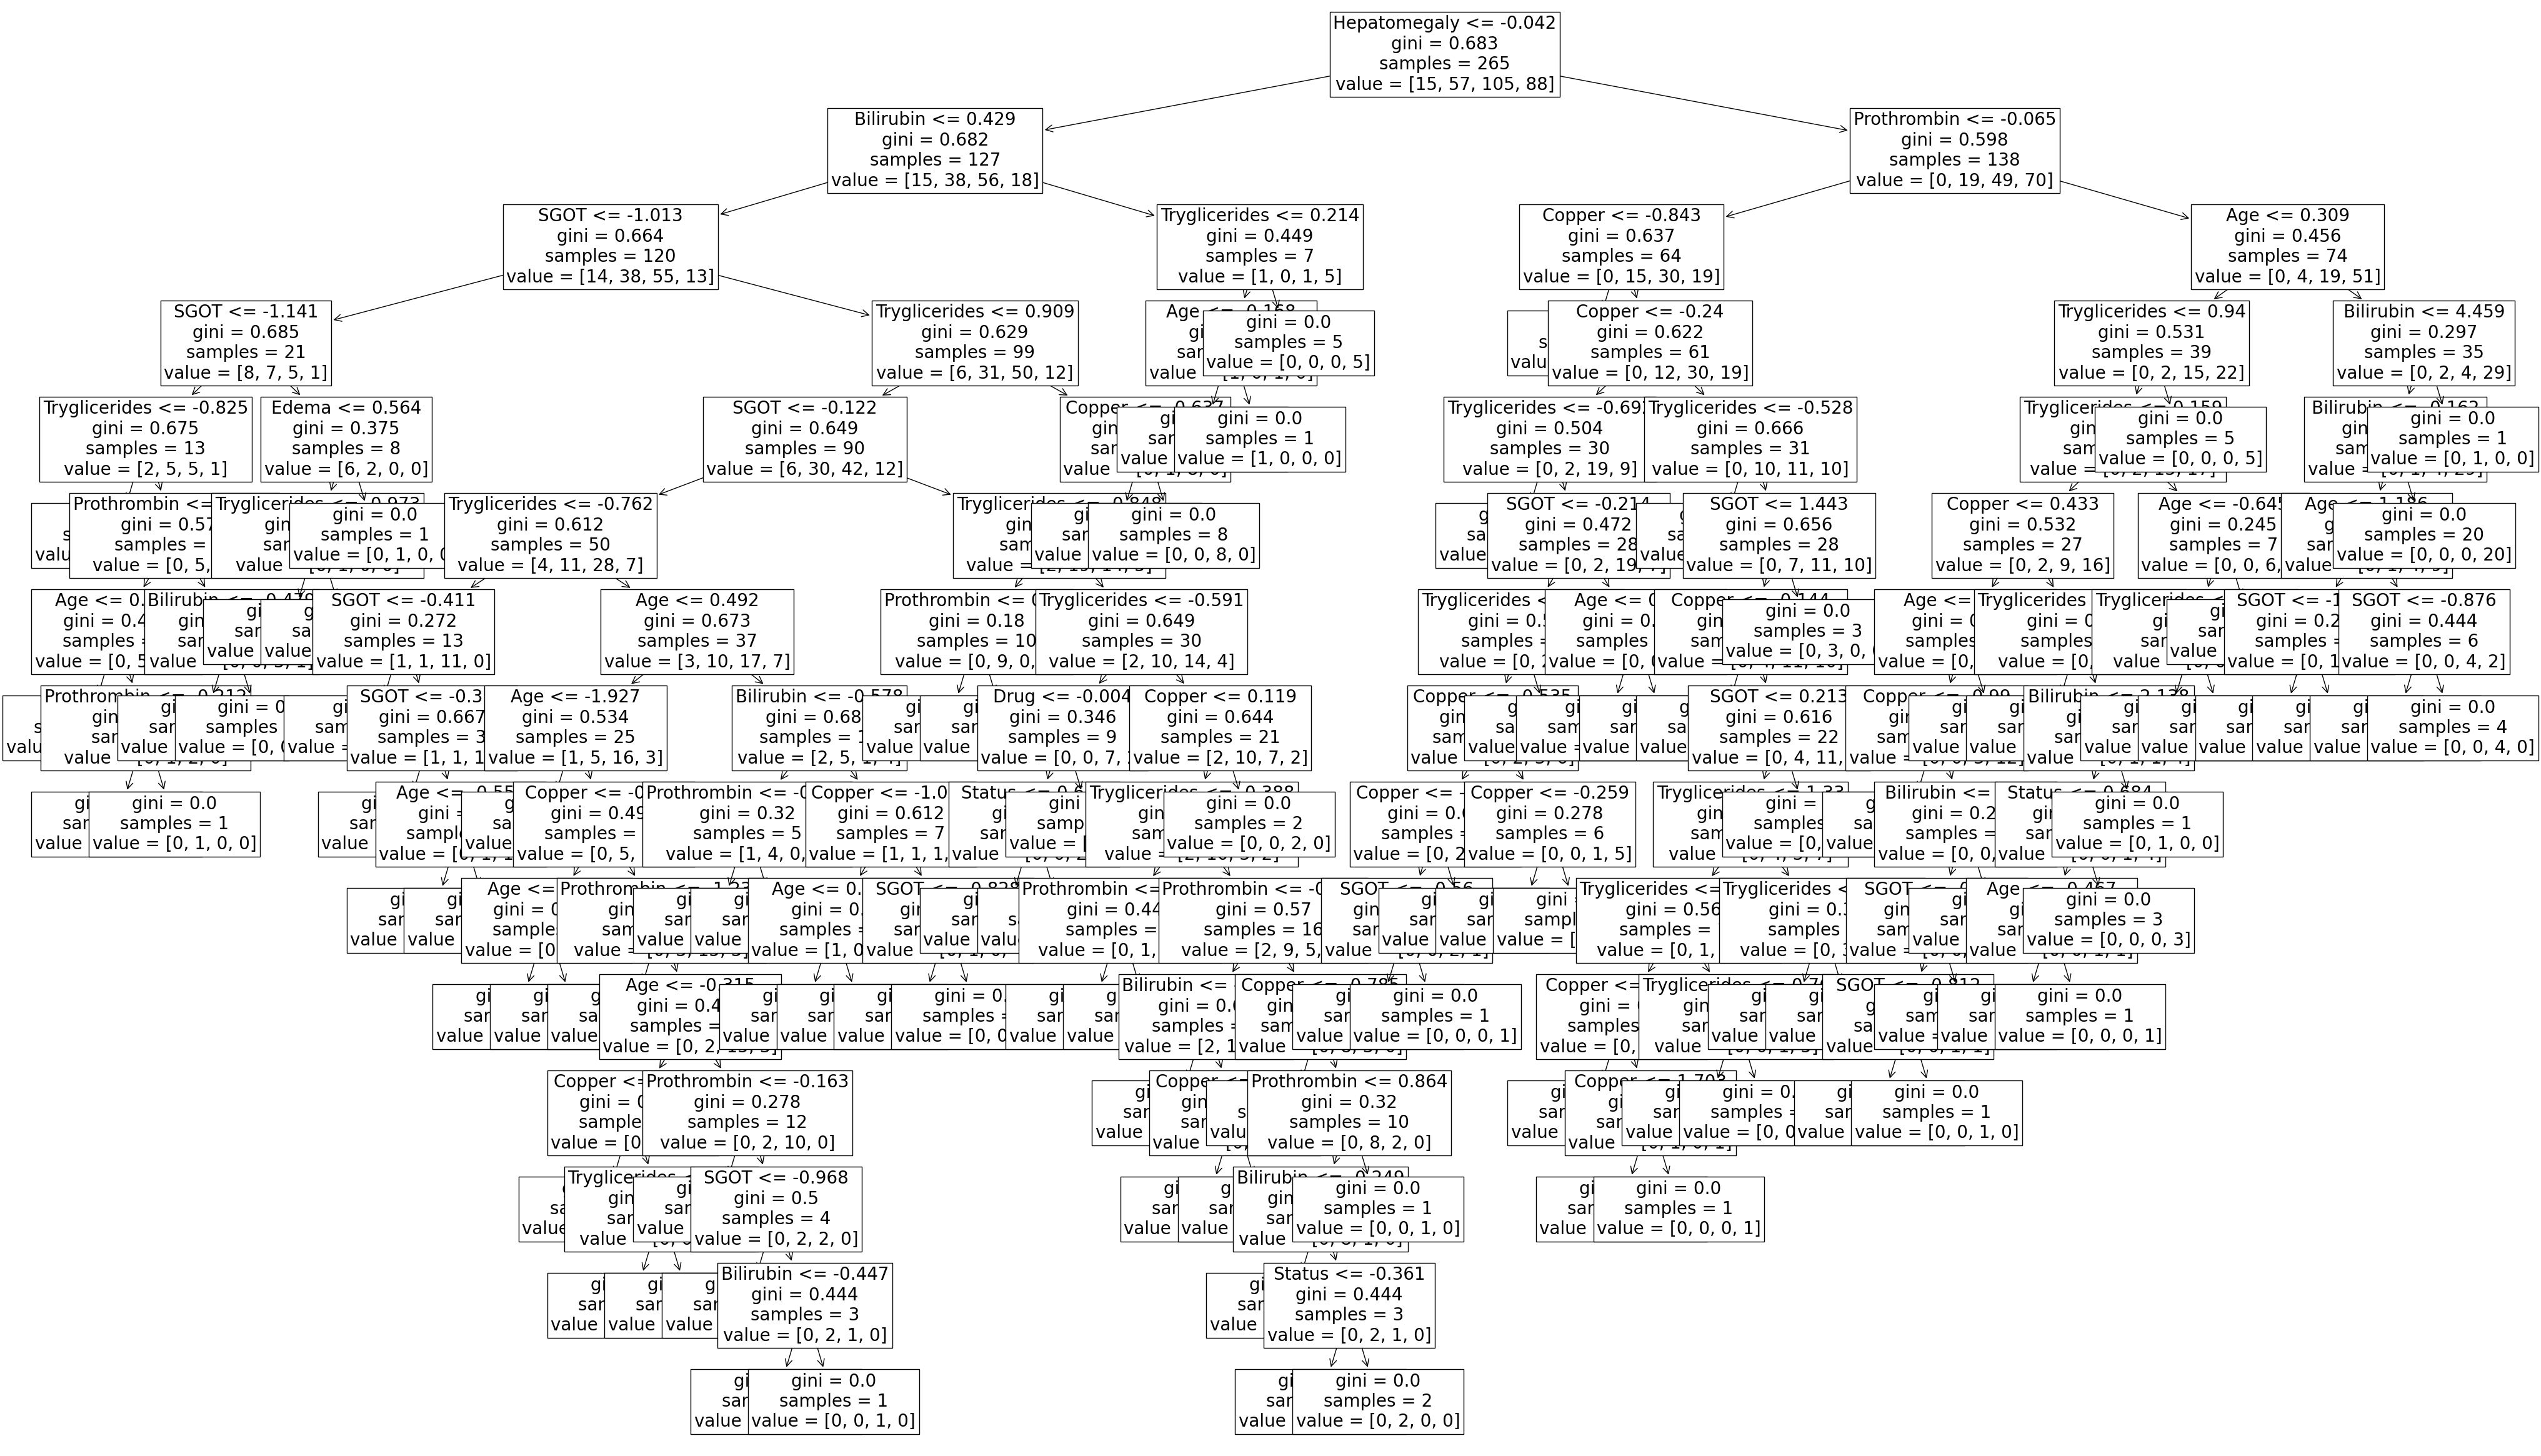

In [232]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt,fontsize=20, feature_names = list)

In [233]:
print(f'accuracy score of Logistic Regression:\n{accuracy_lr}\n\naccuracy score of Decision Tree:\n{accuracy_dt}\n\naccuracy score of Random Forest:\n{accuracy_rf}')

accuracy score of Logistic Regression:
63.829787234042556

accuracy score of Decision Tree:
40.42553191489361

accuracy score of Random Forest:
40.42553191489361


Text(0.5, 1.0, 'Random Forest')

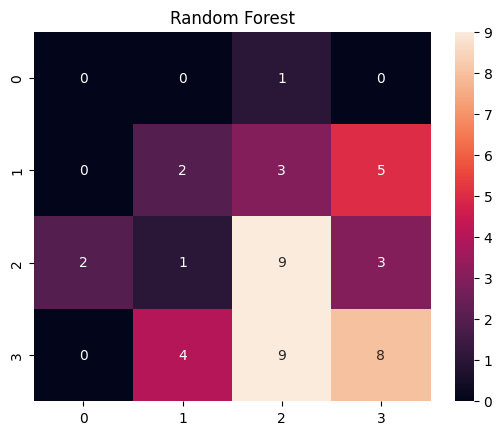

In [235]:
import seaborn as sns
sns.heatmap(matrix_rf, annot=True)
plt.title('Random Forest')

Text(0.5, 1.0, 'Decision Tree')

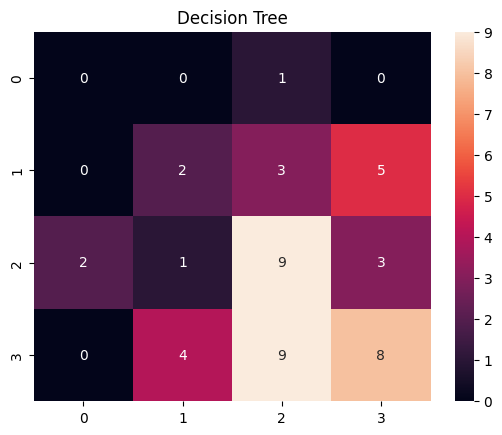

In [236]:
import seaborn as sns
sns.heatmap(matrix_dt, annot=True)
plt.title('Decision Tree')

Text(0.5, 1.0, 'Logistic regression')

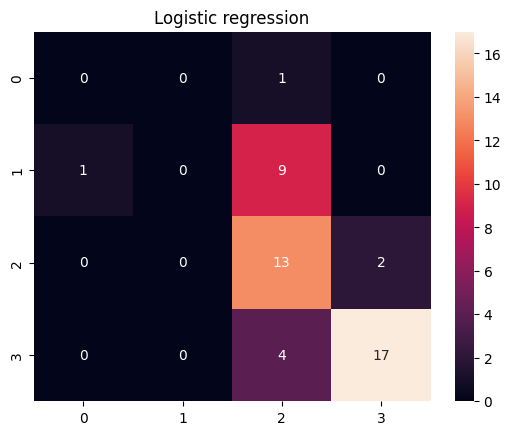

In [237]:
import seaborn as sns
sns.heatmap(matrix_lr, annot=True)
plt.title('Logistic regression')